
 **ADITH S KUMAR**

**19BCI7050**


# Prereq:

1. Download the darknet framework
2. Change the config file
3. Select the weights file
4. Create Dataset folders (Images, labels, training.txt, testing.txt, data,names)
5. Upload to Drive



# Change the runtime to GPU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content/drive/My Drive/Deep_Learning/lab8/yolov3/darknet'

In [ ]:
cd /content/drive/MyDrive/Deep_Learning/lab8/yolov3/darknet

/content/drive/MyDrive/Deep_Learning/lab8/yolov3/darknet


In [ ]:
ls

3rdparty/             darknet*                Makefile
backup/               darknet53.conv74        net_cam_v3.sh*
bad.list              DarknetConfig.cmake.in  net_cam_v4.sh*
build/                darknet_images.py       obj/
build.ps1             darknet.py              README.md
cfg/                  darknet_video.py        results/
chart_cov_yolov3.png  data/                   scripts/
chart.png             image_yolov3.sh*        src/
cmake/                image_yolov4.sh*        vcpkg.json
CMakeLists.txt        include/                video_yolov3.sh*
cov_data/             json_mjpeg_streams.sh*  video_yolov4.sh*
cov_yolov3.cfg        LICENSE


In [ ]:
#!sudo apt install dos2unix

In [ ]:

#!find . -type f -print0 | xargs -0 dos2unix 

In [ ]:
!chmod +x /content/drive/MyDrive/Deep_Learning/lab8/yolov3/darknet

In [ ]:
%pwd

'/content/drive/MyDrive/Deep_Learning/lab8/yolov3/darknet'

In [ ]:
!make

chmod +x *.sh


#backup


In [ ]:
!rm /content/backupf -r

rm: cannot remove '/content/backupf': No such file or directory


In [ ]:
!ln -s /content/drive/MyDrive/Deep_Learning/lab8/yolov3/darknet/cov_data/cov_weights/backup /content/backupf

#darknet53 download

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-11-13 14:21:42--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  38.1MB/s    in 4.3s    

2021-11-13 14:21:46 (36.1 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# Trained the model with limited photos
!./darknet detector train cov_data/cov.data cov_yolov3.cfg darknet53.conv74 -map -dont_show 



Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.425116), count: 2, class_loss = 2.138546, iou_loss = 3.356867, total_loss = 5.495414 
 total_bbox = 5770, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.006825, iou_loss = 0.000000, total_loss = 0.006825 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.622990), count: 1, class_loss = 0.839786, iou_loss = 0.359410, total_loss = 1.199196 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000138, iou_loss = 0.000000, total_loss = 0.000138 
 total_bbox = 5771, rewritten_bbox = 0.000000 % 

 (next mAP calculation at 1000 iterations) 
 829: 1.738778, 2.414997 avg loss, 0.000472 rate, 0.278549 seconds, 1658 images, 0.165786 hours left
Loaded: 0.000046 seconds
v3 (ms

# loading the trained weights

***#testing the trained model with 39.jpg ***

In [ ]:
import numpy as  np
import cv2

In [ ]:
img_to_detect = cv2.imread('/content/drive/MyDrive/Deep_Learning/lab8/yolov3/darknet/cov_data/cov_images/39.jpg')
img_height = img_to_detect.shape[0]
img_width = img_to_detect.shape[1]

In [ ]:
img_blob = cv2.dnn.blobFromImage(img_to_detect, 0.003922, (416, 416), swapRB=True, crop=False)

In [ ]:
class_labels = ["coronavirus"]

In [ ]:
class_colors = ["0,255,0"]
class_colors = [np.array(every_color.split(",")).astype("int") for every_color in class_colors]
class_colors = np.array(class_colors)
class_colors = np.tile(class_colors,(1,1))

In [ ]:
yolo_model = cv2.dnn.readNetFromDarknet('/content/drive/MyDrive/Deep_Learning/lab8/yolov3/darknet/cov_yolov3.cfg','/content/drive/MyDrive/Deep_Learning/lab8/yolov3/darknet/backup/cov_yolov3_best.weights')

In [ ]:
yolo_layers = yolo_model.getLayerNames()
yolo_output_layer = [yolo_layers[yolo_layer[0] - 1] for yolo_layer in yolo_model.getUnconnectedOutLayers()]

yolo_model.setInput(img_blob)

obj_detection_layers = yolo_model.forward(yolo_output_layer)
print(yolo_output_layer)

['yolo_82', 'yolo_94', 'yolo_106']


In [ ]:
yolo_model.setInput(img_blob)

obj_detection_layers = yolo_model.forward(yolo_output_layer)
print(len(obj_detection_layers))


3


In [ ]:

for object_detection_layer in obj_detection_layers:
    for object_detection in object_detection_layer:
        
        
        all_scores = object_detection[5:]
        predicted_class_id = np.argmax(all_scores)
        prediction_confidence = all_scores[predicted_class_id] 
    
        
        if prediction_confidence > 0.20: 
            
            predicted_class_label = class_labels[predicted_class_id] 
            bounding_box = object_detection[0:4] * np.array([img_width, img_height, img_width, img_height])
            print("Boundaries are", bounding_box)
            (box_center_x_pt, box_center_y_pt, box_width, box_height) = bounding_box.astype("int")
            start_x_pt = int(box_center_x_pt - (box_width / 2))
            start_y_pt = int(box_center_y_pt - (box_height / 2))
            end_x_pt = start_x_pt + box_width
            end_y_pt = start_y_pt + box_height
            
           
            box_color = class_colors[predicted_class_id]
            
            
            box_color = [int(c) for c in box_color]
            
           
            predicted_class_label = "{}: {:.2f}%".format(predicted_class_label, prediction_confidence * 100)
            print("predicted object {}".format(predicted_class_label))
            
           
            cv2.rectangle(img_to_detect, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), box_color, 1)
            cv2.putText(img_to_detect, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 1)

Boundaries are [ 80.45581877 101.78951025  78.12706232  96.99608088]
predicted object coronavirus: 43.25%
Boundaries are [180.26263118 271.43547535  34.28250253  42.3849687 ]
predicted object coronavirus: 44.56%


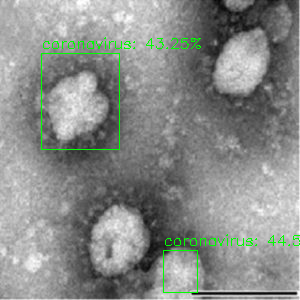

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img_to_detect)

***#testing the trained model with 22.jpg ***

In [ ]:
img_to_detect = cv2.imread('/content/drive/MyDrive/Deep_Learning/lab8/yolov3/darknet/cov_data/cov_images/22.jpg')
img_height = img_to_detect.shape[0]
img_width = img_to_detect.shape[1]

In [ ]:
img_blob = cv2.dnn.blobFromImage(img_to_detect, 0.003922, (416, 416), swapRB=True, crop=False)

In [ ]:
class_labels = ["coronavirus"]

In [ ]:
class_colors = ["0,255,0"]
class_colors = [np.array(every_color.split(",")).astype("int") for every_color in class_colors]
class_colors = np.array(class_colors)
class_colors = np.tile(class_colors,(1,1))

In [ ]:
yolo_model = cv2.dnn.readNetFromDarknet('/content/drive/MyDrive/Deep_Learning/lab8/yolov3/darknet/cov_yolov3.cfg','/content/drive/MyDrive/Deep_Learning/lab8/yolov3/darknet/backup/cov_yolov3_best.weights')

In [ ]:
yolo_layers = yolo_model.getLayerNames()
yolo_output_layer = [yolo_layers[yolo_layer[0] - 1] for yolo_layer in yolo_model.getUnconnectedOutLayers()]

yolo_model.setInput(img_blob)

obj_detection_layers = yolo_model.forward(yolo_output_layer)
print(yolo_output_layer)

['yolo_82', 'yolo_94', 'yolo_106']


In [ ]:
yolo_model.setInput(img_blob)

obj_detection_layers = yolo_model.forward(yolo_output_layer)
print(len(obj_detection_layers))


3


In [ ]:

for object_detection_layer in obj_detection_layers:
    for object_detection in object_detection_layer:
        
        
        all_scores = object_detection[5:]
        predicted_class_id = np.argmax(all_scores)
        prediction_confidence = all_scores[predicted_class_id] 
    
        
        if prediction_confidence > 0.20: 
            
            predicted_class_label = class_labels[predicted_class_id] 
            bounding_box = object_detection[0:4] * np.array([img_width, img_height, img_width, img_height])
            print("Boundaries are", bounding_box)
            (box_center_x_pt, box_center_y_pt, box_width, box_height) = bounding_box.astype("int")
            start_x_pt = int(box_center_x_pt - (box_width / 2))
            start_y_pt = int(box_center_y_pt - (box_height / 2))
            end_x_pt = start_x_pt + box_width
            end_y_pt = start_y_pt + box_height
            
           
            box_color = class_colors[predicted_class_id]
            
            
            box_color = [int(c) for c in box_color]
            
           
            predicted_class_label = "{}: {:.2f}%".format(predicted_class_label, prediction_confidence * 100)
            print("predicted object {}".format(predicted_class_label))
            
           
            cv2.rectangle(img_to_detect, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), box_color, 1)
            cv2.putText(img_to_detect, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 1)

Boundaries are [851.50657654 555.89453459 437.77765274 346.15871787]
predicted object coronavirus: 30.79%


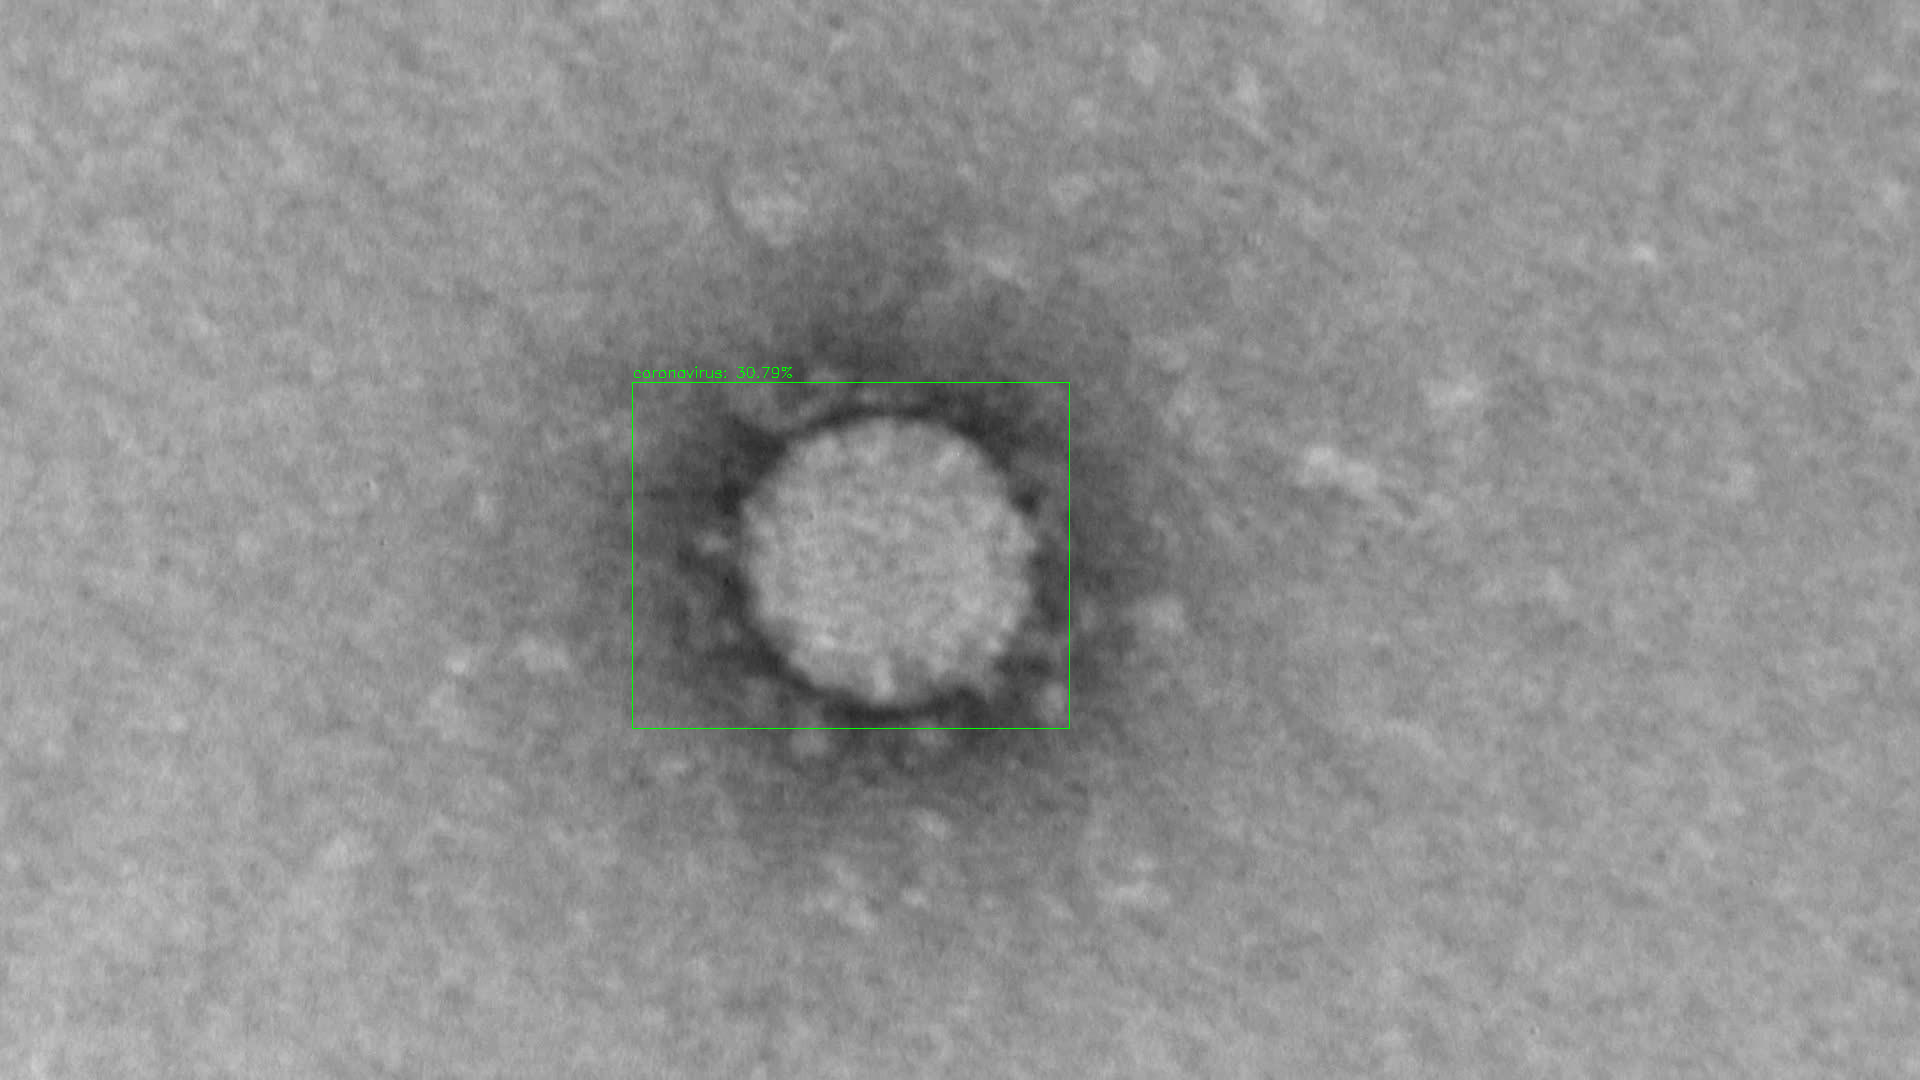

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img_to_detect)

***#testing the trained model with 15.jpg ***





In [ ]:
img_to_detect = cv2.imread('/content/drive/MyDrive/Deep_Learning/lab8/yolov3/darknet/cov_data/cov_images/15.jpg')
img_height = img_to_detect.shape[0]
img_width = img_to_detect.shape[1]

In [ ]:
img_blob = cv2.dnn.blobFromImage(img_to_detect, 0.003922, (416, 416), swapRB=True, crop=False)

In [ ]:
class_labels = ["coronavirus"]

In [ ]:
class_colors = ["0,255,0"]
class_colors = [np.array(every_color.split(",")).astype("int") for every_color in class_colors]
class_colors = np.array(class_colors)
class_colors = np.tile(class_colors,(1,1))

In [ ]:
yolo_model = cv2.dnn.readNetFromDarknet('/content/drive/MyDrive/Deep_Learning/lab8/yolov3/darknet/cov_yolov3.cfg','/content/drive/MyDrive/Deep_Learning/lab8/yolov3/darknet/backup/cov_yolov3_best.weights')

In [ ]:
yolo_layers = yolo_model.getLayerNames()
yolo_output_layer = [yolo_layers[yolo_layer[0] - 1] for yolo_layer in yolo_model.getUnconnectedOutLayers()]

yolo_model.setInput(img_blob)

obj_detection_layers = yolo_model.forward(yolo_output_layer)
print(yolo_output_layer)

['yolo_82', 'yolo_94', 'yolo_106']


In [ ]:
yolo_model.setInput(img_blob)

obj_detection_layers = yolo_model.forward(yolo_output_layer)
print(len(obj_detection_layers))


3


In [ ]:

for object_detection_layer in obj_detection_layers:
    for object_detection in object_detection_layer:
        
        
        all_scores = object_detection[5:]
        predicted_class_id = np.argmax(all_scores)
        prediction_confidence = all_scores[predicted_class_id] 
    
        
        if prediction_confidence > 0.20: 
            
            predicted_class_label = class_labels[predicted_class_id] 
            bounding_box = object_detection[0:4] * np.array([img_width, img_height, img_width, img_height])
            print("Boundaries are", bounding_box)
            (box_center_x_pt, box_center_y_pt, box_width, box_height) = bounding_box.astype("int")
            start_x_pt = int(box_center_x_pt - (box_width / 2))
            start_y_pt = int(box_center_y_pt - (box_height / 2))
            end_x_pt = start_x_pt + box_width
            end_y_pt = start_y_pt + box_height
            
           
            box_color = class_colors[predicted_class_id]
            
            
            box_color = [int(c) for c in box_color]
            
           
            predicted_class_label = "{}: {:.2f}%".format(predicted_class_label, prediction_confidence * 100)
            print("predicted object {}".format(predicted_class_label))
            
           
            cv2.rectangle(img_to_detect, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), box_color, 1)
            cv2.putText(img_to_detect, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 1)

Boundaries are [174.23355579 203.24635577  78.48021984 101.10183585]
predicted object coronavirus: 51.92%
Boundaries are [167.36545563 218.32366848 189.57927227 167.98740292]
predicted object coronavirus: 28.46%
Boundaries are [221.91808224 282.97404671 228.2276392  134.94126606]
predicted object coronavirus: 24.57%


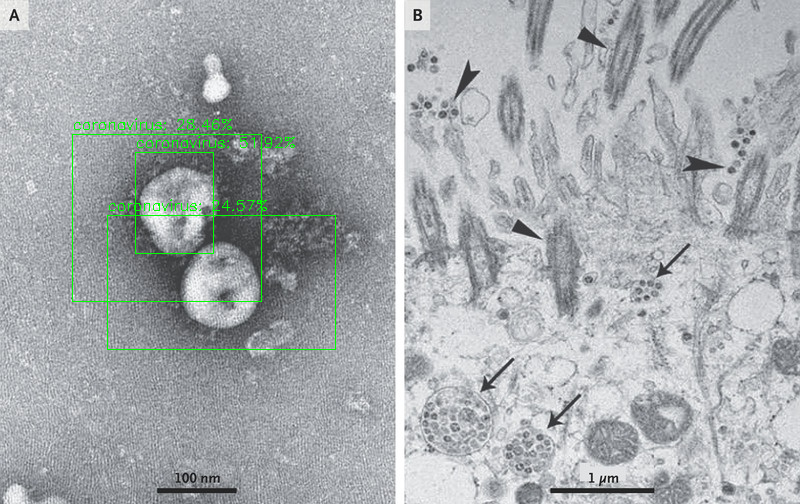

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img_to_detect)